# Assignment 1

# README

## Dependencies

- numpy
- matplotlib
- pandas
- openpyxl
- The assignments data files (must be in the same folder as this notebook)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

for f in ["x_train.npy", "y_train.npy", "x_test.npy", "y_test.npy", "Housing_data_regression.xlsx"]:
    print(f"Found {f}...{"✅" if os.path.isfile(f) else "❌"}")

Found x_train.npy...✅
Found y_train.npy...✅
Found x_test.npy...✅
Found y_test.npy...✅
Found Housing_data_regression.xlsx...✅


## Question 1

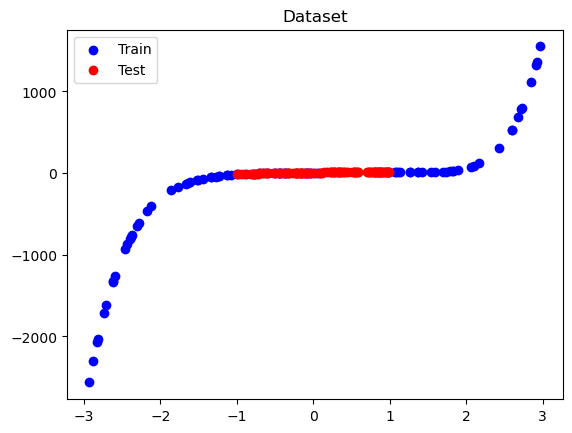

In [2]:
x_train = np.load("x_train.npy")
y_train = np.load("y_train.npy")
x_test = np.load("x_test.npy")
y_test = np.load("y_test.npy")

plt.title("Dataset")
plt.scatter(x_train, y_train, color="blue")
plt.scatter(x_test, y_test, color="red")
plt.legend(["Train", "Test"])
plt.show()

In [3]:
def linear_regression(X, Y, alpha, num_iterations):
    """
    Linear regression implemeted using gradient descent.

    Args:
    - X, Y: training data set
    - alpha: learning rate
    - num_iteraions: maximum number of iterations to run

    Returns:
    - The parameters as a list: [\theta_0, \theta_1, ...]

    Uses least squares loss function:
    $$
    \frac{1}{2}(y - h(x))^2
    $$
    Where:
    $$
    h(x) = \theta_0 + {\theta_1}x
    $$
    """

    assert len(X.shape) in [1, 2], "X must be at most 2D"
    assert len(Y.shape) == 1 or (len(Y.shape) == 2 and Y.shape[1] == 1), "Y must be 1D"

    # Convert X and Y from (n,) to (n,1)
    if len(X.shape) == 1:
        X = X.reshape((len(X), 1))
    Y = Y.reshape((len(Y), 1))

    # Add 1 as first column of X for $\theta_0$
    X = np.insert(X, 0, 1, axis=1)
    
    # Random initialization
    theta = np.random.rand(X.shape[1])

    for i in range(num_iterations):
        # Compute derivative loss w.r.t theta
        d_theta = alpha * ((Y.T - (X @ theta.T)) @ X)

        # Log progress
        if i % (num_iterations // 10) == 0:
            loss = np.sum((Y.T - (X @ theta.T)) ** 2)
            print(f"Iteration {i} | Loss: {loss:.4f} | Change: {np.linalg.norm(d_theta):.4f}")

        # Exit early upon convergence
        if np.linalg.norm(d_theta) < 1e-6:
            print(f"Stopped early after {i + 1} iterations")
            break

        theta += d_theta[0]
    return theta

Iteration 0 | Loss: 45275185.2219 | Change: 8.9233
Iteration 1000 | Loss: 17282260.3412 | Change: 0.0000
Stopped early after 1373 iterations
----------------------------------------------------------------------------------------------------
Theta = [-106.1736961   300.61955362]
Total loss (test): 3528132.405418987
Visualization:


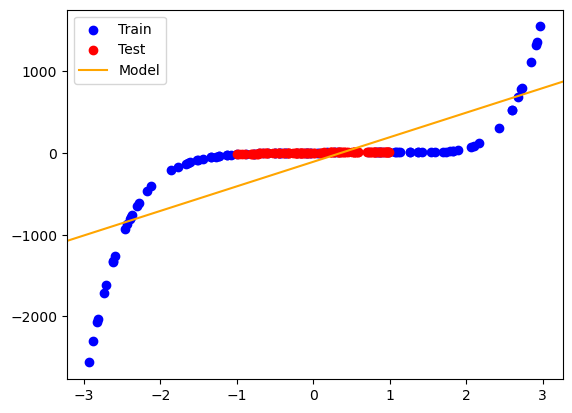

In [4]:
theta = linear_regression(x_train, y_train, 0.0001, 10_000)
print("-"*100)
print(f"Theta = {theta}")
model = lambda x: np.dot(theta, [1, x])
loss = sum((y - model(x)) ** 2 for x, y in zip(x_test, y_test))
print(f"Total loss (test): {loss}")

print("Visualization:")
plt.scatter(x_train, y_train, color="blue")
plt.scatter(x_test, y_test, color="red")
plt.axline((0, theta[0]), slope=theta[1], color="orange")
plt.legend(["Train", "Test", "Model"])
plt.show()

del theta, model, loss

## Report

# Question 2

In [5]:
q2_stats = {}

## All Columns

In [6]:
df = pd.read_excel("Housing_data_regression.xlsx")
x_df = df.loc[:, df.columns != "Price"]
X = x_df.to_numpy()
Y = df[["Price"]].to_numpy()

theta = linear_regression(X, Y, 4e-5, 1_000_000)
print("-"*100)

print(f"Theta = {theta}")
model = lambda x: np.dot(theta, np.insert(x, 0, 1))
loss = sum((y - model(x)) ** 2 for x, y in zip(X, Y))

print(f"Total loss: {loss}")
print(f"Average loss: {loss / len(X)}")

q2_stats["all"] = {
    "total_loss": loss,
    "avg_loss": loss / len(X)
}

arguments_by_weight = sorted(zip(list(x_df.columns), theta[1:]), key=lambda t: np.abs(t[1]), reverse=True)
print("Parameters by weight (most to least important):")
for name, val in arguments_by_weight:
    print(f"\t{name:<20}{val:.4f}")

del theta, model, loss

Iteration 0 | Loss: 11252954228122.4355 | Change: 20952.8203
Iteration 100000 | Loss: 101197032858.8335 | Change: 0.5790
Iteration 200000 | Loss: 100323432472.9018 | Change: 0.2888
Iteration 300000 | Loss: 100088003070.5096 | Change: 0.1525
Iteration 400000 | Loss: 100022239417.0332 | Change: 0.0807
Iteration 500000 | Loss: 100003855188.4023 | Change: 0.0426
Iteration 600000 | Loss: 99998715464.4075 | Change: 0.0225
Iteration 700000 | Loss: 99997278521.9853 | Change: 0.0119
Iteration 800000 | Loss: 99996876786.9373 | Change: 0.0063
Iteration 900000 | Loss: 99996764471.3075 | Change: 0.0033
----------------------------------------------------------------------------------------------------
Theta = [-222221.52580495     748.72656061  207496.96647372    9548.98200404
  230946.19320658   46593.04736808  110248.87540305 -144108.28696534
   -2025.66400752]
Total loss: [9.99967331e+10]
Average loss: [4.99983665e+09]
Parameters by weight (most to least important):
	Living area         230946.1

## Most Important Only

In [7]:
X = x_df[[arguments_by_weight[0][0]]].to_numpy()

theta = linear_regression(X, Y, 0.0001, 100_000)
print("-"*100)

print(f"Theta = {theta}")
model = lambda x: np.dot(theta, np.insert(x, 0, 1))
loss = sum((y - model(x)) ** 2 for x, y in zip(X, Y))
print(f"Total loss: {loss}")
print(f"Average loss: {loss / len(X)}")

q2_stats["only_important"] = {
    "total_loss": loss,
    "avg_loss": loss / len(X)
}

del theta, model, loss

Iteration 0 | Loss: 11253778538181.8320 | Change: 2740.5826
Iteration 10000 | Loss: 247628843197.0339 | Change: 6.5895
Iteration 20000 | Loss: 245676743617.5002 | Change: 0.7323
Iteration 30000 | Loss: 245652637373.2129 | Change: 0.0814
Iteration 40000 | Loss: 245652339688.0845 | Change: 0.0090
Iteration 50000 | Loss: 245652336012.0066 | Change: 0.0010
Iteration 60000 | Loss: 245652335966.6111 | Change: 0.0001
Iteration 70000 | Loss: 245652335966.0505 | Change: 0.0000
Iteration 80000 | Loss: 245652335966.0436 | Change: 0.0000
Stopped early after 81464 iterations
----------------------------------------------------------------------------------------------------
Theta = [-27219.37205521 478405.49547834]
Total loss: [2.45652336e+11]
Average loss: [1.22826168e+10]


## Least Important Removed

In [8]:
X = x_df.loc[:, x_df.columns != arguments_by_weight[-1][0]].to_numpy()

theta = linear_regression(X, Y, 4e-5, 1_000_000)
print("-"*100)

print(f"Theta = {theta}")
model = lambda x: np.dot(theta, np.insert(x, 0, 1))
loss = sum((y - model(x)) ** 2 for x, y in zip(X, Y))
print(f"Total loss: {loss}")
print(f"Average loss: {loss / len(X)}")

q2_stats["no_unimportant"] = {
    "total_loss": loss,
    "avg_loss": loss / len(X)
}

del theta, model, loss

Iteration 0 | Loss: 11252865527659.4121 | Change: 20049.4617
Iteration 100000 | Loss: 101272509413.7342 | Change: 0.5631
Iteration 200000 | Loss: 100425629960.4364 | Change: 0.2812
Iteration 300000 | Loss: 100208326627.1166 | Change: 0.1437
Iteration 400000 | Loss: 100151457218.9286 | Change: 0.0736
Iteration 500000 | Loss: 100136538242.9344 | Change: 0.0377
Iteration 600000 | Loss: 100132623150.0874 | Change: 0.0193
Iteration 700000 | Loss: 100131595691.0167 | Change: 0.0099
Iteration 800000 | Loss: 100131326047.7156 | Change: 0.0051
Iteration 900000 | Loss: 100131255283.2718 | Change: 0.0026
----------------------------------------------------------------------------------------------------
Theta = [-213441.26777637  209148.8456655    10185.2913993   228748.64115702
   48000.72742875  113498.539252   -151106.5435271    -2134.33019558]
Total loss: [1.00131237e+11]
Average loss: [5.00656184e+09]


## Analysis

### What is the average least squares error for the given data using your simple linear regression model?

In [9]:
print(f"Average least squares error: {q2_stats["all"]["avg_loss"].item():.3f}")

Average least squares error: 4999836653.525


### Which factor has the most effect on the final value? How do you know this? Can you use only this feature to predict the price?

The most important factor can be determining by looking for the column whose associated $\theta$ value has the maximum absolute value.

The most important factor is printed below:

In [10]:
print(f"Most important column: {arguments_by_weight[0][0]} (theta value = {arguments_by_weight[0][1].item():.3f})")

Most important column: Living area (theta value = 230946.193)


### Which factor has the least effect on the final value? How do you know this? What effect does removing this feature have on the performance?

The least important factor can be determined by looking for the column whose associated $\theta$ value has the minimum absolute value

The lest important factor is printed below:

In [11]:
print(f"Least important column: {arguments_by_weight[-1][0]} (theta value = {arguments_by_weight[-1][1].item():.3f})")

Least important column: House ID (theta value = 748.727)
